EN2550 - Fundementals of Image Processing and Machine Vision

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Hough Transform

Part1

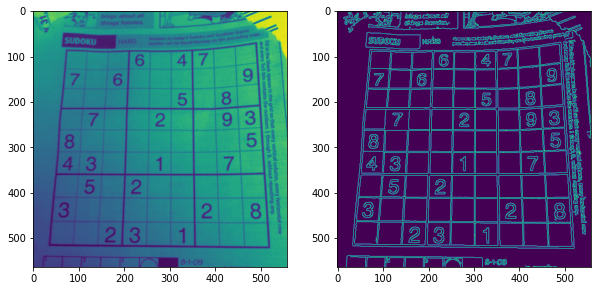

In [11]:
img = cv.imread('sudoku.png', cv.IMREAD_COLOR)  
img = cv.imread('sudoku.png', cv.IMREAD_COLOR)
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize = 3)
lines = cv.HoughLines(edges, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0+1000*(-b)), int(y0+1000*(-a))
    x2,y2 = int(x0-1000*(-b)), int(y0-1000*(-a))
    cv.line(img, (x1,y1),(x2,y2),(0,0,255),2)
    
fig,ax = plt.subplots(1,2,figsize = (10, 10))
ax[0].imshow(gray)
ax[1].imshow(edges)



Part 2

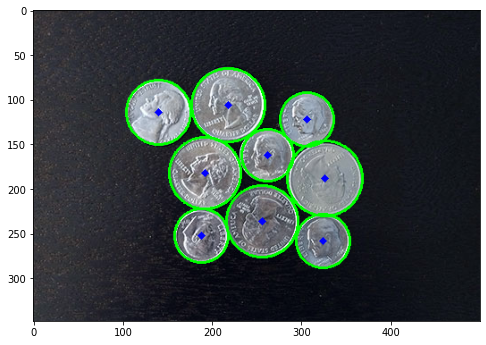

In [10]:
img = cv.imread('coins.jpg', cv.IMREAD_COLOR)  
assert img is not None

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray,5)
circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,50, param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(img,(i[0],i[1]),2,(0,0,255),3)

fig,ax = plt.subplots(figsize = (8, 8))
ax.imshow(img)


Part 3

In [9]:
im = cv.imread('pic1.png',cv.IMREAD_COLOR)

templ = cv.imread('templ.png',cv.IMREAD_COLOR)

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
im_edges = cv.Canny(im, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x,y,scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    print("")
    cv.rectangle(out, p1, p2, (0,0,255))



error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\demosaicing.cpp:1721: error: (-215:Assertion failed) scn == 1 && (dcn == 3 || dcn == 4) in function 'cv::demosaicing'


Alignment

Part 4

Part 5